In [2]:
import scanpy as sc
import anndata as ann
import pyreadr
import scipy as sci
import pandas as pd
import os
import numpy as np
import louvain

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/elihei/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/elihei/.matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
sc_integrated=sc.read_hdf("../data/scATAC/assays.h5", key = "assay001")
var=pd.read_csv("../data/scATAC/var.csv")
var.index=var.gene_name
sc_integrated.var = var
obs=pd.read_csv("../data/scATAC/obs.csv")
obs.index=obs.iloc[:,0]
sc_integrated.obs = obs

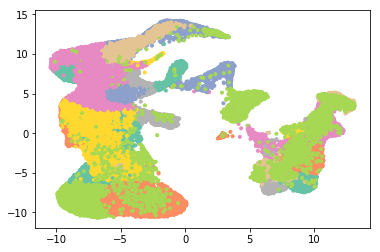

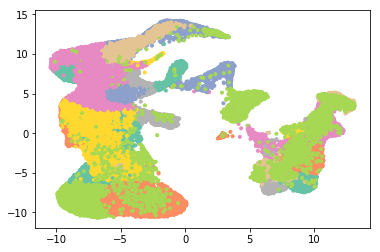

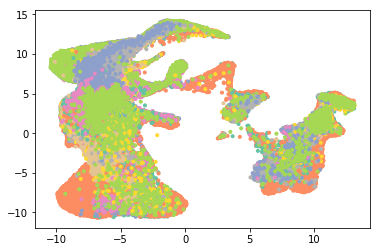

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

col_data=sc_integrated.obs

color_labels = col_data.ProjectClassification.unique()
rgb_values = sns.color_palette("Set2", 60)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(col_data.ProjectUMAP1, col_data.ProjectUMAP2,
            marker='.', c=col_data.ProjectClassification.map(color_map))
plt.show()

# col_data= col_data[col_data.ProjectClassification != 'Reference']

plt.scatter(col_data.ProjectUMAP1, col_data.ProjectUMAP2,
            marker='.', c=col_data.ProjectClassification.map(color_map))
plt.show()


color_labels =col_data.Group.unique()
rgb_values = sns.color_palette("Set2", 60)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(col_data.ProjectUMAP1, col_data.ProjectUMAP2,
            marker='.', c=col_data.Group.map(color_map))
plt.show()

In [ ]:
# EDA
## pca
sc.tl.pca(sc_integrated, svd_solver='arpack')
# sc.pl.pca(sc_integrated, color='CST3')
# sc.pl.pca_variance_ratio(sc_integrated, log=True)
## umap
sc.pp.neighbors(sc_integrated, n_neighbors=10, n_pcs=40)
sc.tl.umap(sc_integrated)
sc.pl.umap(sc_integrated, color=['ProjectClassification', 'Group'])
sc.pl.umap(sc_integrated, color=['ProjectClassification', 'Group'])

In [ ]:
surface_markers=['CD3D', 'CD14', 'CD19', 'CD8A']
TFs = ['CEBPB', 'GATA1', 'TBX21', 'PAX5']
sc.pl.umap(sc_integrated, color=surface_markers)
sc.pl.umap(sc_integrated, color=TFs)